### This section uses beautiful soup to retrieve current data on domain.com.au

Reference https://www.xbyte.io/how-to-use-python-to-scrape-real-estate-website-data-using-web-scraping-and-making-data-wrangling.php

### 1. Scraping

In [1]:
# built-in imports
import re
from json import dump

from collections import defaultdict

# user packages
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

In [2]:
# constants
BASE_URL = "https://www.domain.com.au"
N_PAGES = range(1, 51) # update this to your liking

# begin code
url_links = []
property_metadata = defaultdict(dict)

# generate list of urls to visit
for page in N_PAGES:
    # acts as an authentic browser
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.47"}
    url = BASE_URL + f"/rent/melbourne-region-vic/?sort=price-desc&page={page}"
    bs_object = BeautifulSoup(requests.get(url, headers=headers).text, "html.parser")

    # find the unordered list (ul) elements which are the results, then
    # find all href (a) tags that are from the base_url website.
    index_links = bs_object \
        .find(
            "ul",
            {"data-testid": "results"}
        ) \
        .findAll(
            "a",
            href=re.compile(f"{BASE_URL}/*") # the `*` denotes wildcard any
        )

    for link in index_links:
        # if its a property address, add it to the list
        if 'address' in link['class']:
            url_links.append(link['href'])

In [3]:
url_links

['https://www.domain.com.au/202-4-chapel-mews-south-yarra-vic-3141-16065573',
 'https://www.domain.com.au/667-glenhuntly-road-caulfield-vic-3162-11598047',
 'https://www.domain.com.au/upstairs-2c-staley-street-brunswick-vic-3056-13168913',
 'https://www.domain.com.au/level-3-302-13-15-lake-street-caroline-springs-vic-3023-15994395',
 'https://www.domain.com.au/3502-14-16-the-esplanade-st-kilda-vic-3182-16002767',
 'https://www.domain.com.au/9-lansdowne-street-blairgowrie-vic-3942-12127675',
 'https://www.domain.com.au/52-black-st-brighton-vic-3186-15410646',
 'https://www.domain.com.au/4203-35-spring-street-melbourne-vic-3000-15939303',
 'https://www.domain.com.au/440-keys-road-flinders-vic-3929-16065322',
 'https://www.domain.com.au/335-the-esplanade-indented-head-vic-3223-12688424',
 'https://www.domain.com.au/50-south-wharf-drive-docklands-vic-3008-16048359',
 'https://www.domain.com.au/901-902-85-market-street-south-melbourne-vic-3205-14089455',
 'https://www.domain.com.au/9-keith-

In [4]:
"""
mock_url = url_links[5]
bsobj = BeautifulSoup(requests.get(mock_url, headers=headers).text, "html.parser")
# extracting address/name of property
property_name = bsobj.find("h1", {"class": "css-164r41r"})
print(property_name)
# extracting baths, rooms, parking etc
all_basic_features = bsobj.find("div", {"data-testid": "property-features-wrapper"}).findAll("span", {"data-testid": "property-features-text-container"})
print(all_basic_features)
print(f"length of all basic features = {len(all_basic_features)}")
# extracting property price
property_price = bsobj.find("div", {"data-testid": "listing-details__summary-title"})
print(property_price)
# extracting latitudes and longitudes
lat_long = bsobj.find("a", {"target": "_blank", 'rel': "noopener noreferer"})
print(lat_long)
# dictionary to store temporary data
basic_feature_dict = {}
"""

'\nmock_url = url_links[5]\nbsobj = BeautifulSoup(requests.get(mock_url, headers=headers).text, "html.parser")\n# extracting address/name of property\nproperty_name = bsobj.find("h1", {"class": "css-164r41r"})\nprint(property_name)\n# extracting baths, rooms, parking etc\nall_basic_features = bsobj.find("div", {"data-testid": "property-features-wrapper"}).findAll("span", {"data-testid": "property-features-text-container"})\nprint(all_basic_features)\nprint(f"length of all basic features = {len(all_basic_features)}")\n# extracting property price\nproperty_price = bsobj.find("div", {"data-testid": "listing-details__summary-title"})\nprint(property_price)\n# extracting latitudes and longitudes\nlat_long = bsobj.find("a", {"target": "_blank", \'rel\': "noopener noreferer"})\nprint(lat_long)\n# dictionary to store temporary data\nbasic_feature_dict = {}\n'

In [5]:
#all_basic_features[0]
#"property-features-text" in all_basic_features[0]

In [6]:
"""
r1 = 'text\">(.+?)<\/span>|-->(.?)<\/span>'
pat_feature = re.compile(r1)
pat_feature.findall(str(all_basic_features[1]))[0][0]
"""

'\nr1 = \'text">(.+?)<\\/span>|-->(.?)<\\/span>\'\npat_feature = re.compile(r1)\npat_feature.findall(str(all_basic_features[1]))[0][0]\n'

In [7]:
"""
pat_value = re.compile(r">(.+?)<!")
pat_value.findall(str(all_basic_features[1]))[0]
"""

'\npat_value = re.compile(r">(.+?)<!")\npat_value.findall(str(all_basic_features[1]))[0]\n'

In [8]:
"""
basic_feature_dict[pat_feature.findall(str(all_basic_features[0]))[0]] = pat_value.findall(str(all_basic_features[0]))[0]
basic_feature_dict[pat_feature.findall(str(all_basic_features[1]))[0]] = pat_value.findall(str(all_basic_features[1]))[0]
basic_feature_dict[pat_feature.findall(str(all_basic_features[2]))[0]] = pat_value.findall(str(all_basic_features[2]))[0]
basic_feature_dict
"""

'\nbasic_feature_dict[pat_feature.findall(str(all_basic_features[0]))[0]] = pat_value.findall(str(all_basic_features[0]))[0]\nbasic_feature_dict[pat_feature.findall(str(all_basic_features[1]))[0]] = pat_value.findall(str(all_basic_features[1]))[0]\nbasic_feature_dict[pat_feature.findall(str(all_basic_features[2]))[0]] = pat_value.findall(str(all_basic_features[2]))[0]\nbasic_feature_dict\n'

#### Now, we also have the URLs about every property of Melbourne, Australia. Every URL is exclusive for every property in Melbourne. So, the next step would be, going inside every URL as well as scrape prices, total bedrooms, total bathrooms, total parking, addresses and locations.

In [9]:
# removing duplicate links while maintaining the order of urls
abc_links = [] 
for i in url_links: 
    if i not in abc_links: 
        abc_links.append(i) 
        
# defining required regural expression for data extraction     
pat_feature = re.compile(r'text\">(.+?)<\/span>|-->(.?)<\/span>')
pat_value = re.compile(r">(.+?)<!")
pattern1 = re.compile(r'>(.+)<.')
pattern2 = re.compile(r'destination=(.+)" rel=.')
basic_feature_list = []
# loop to iterate through each url
for property_url in abc_links:
    
    bsobj = BeautifulSoup(requests.get(property_url, headers=headers).text, "html.parser")
    
    # extracting address/name of property
    property_name = bsobj.find("h1", {"class": "css-164r41r"})
    
    # extracting baths, rooms, parking etc
    all_basic_features = bsobj.find("div", {"data-testid": "property-features-wrapper"}).findAll("span", {"data-testid": "property-features-text-container"})
    print(f"length of all basic features = {len(all_basic_features)}")
    print(all_basic_features)
    # extracting property price
    property_price = bsobj.find("div", {"data-testid": "listing-details__summary-title"})
    
    # extracting latitudes and longitudes
    lat_long = bsobj.find("a", {"target": "_blank", 'rel': "noopener noreferer"})
    
    # dictionary to store temporary data
    basic_feature_dict = {}
    
    # few properties does not contain all the 4 features such as rooms, baths, parkings, area. So need to check
    # how many features they contain
    if len(all_basic_features) == 4:
        basic_feature_dict[pat_feature.findall(str(all_basic_features[0]))[0][0]] = pat_value.findall(str(all_basic_features[0]))[0]
        basic_feature_dict[pat_feature.findall(str(all_basic_features[1]))[0][0]] = pat_value.findall(str(all_basic_features[1]))[0]
        basic_feature_dict[pat_feature.findall(str(all_basic_features[2]))[0][0]] = pat_value.findall(str(all_basic_features[2]))[0]
        basic_feature_dict['area'] = pat_value.findall(str(all_basic_features[3]))[0]
        
    elif len(all_basic_features) == 3:
        basic_feature_dict[pat_feature.findall(str(all_basic_features[0]))[0][0]] = pat_value.findall(str(all_basic_features[0]))[0]
        basic_feature_dict[pat_feature.findall(str(all_basic_features[1]))[0][0]] = pat_value.findall(str(all_basic_features[1]))[0]
        basic_feature_dict[pat_feature.findall(str(all_basic_features[2]))[0][0]] = pat_value.findall(str(all_basic_features[2]))[0]
        
    elif len(all_basic_features) == 2:
        basic_feature_dict[pat_feature.findall(str(all_basic_features[0]))[0][0]] = pat_value.findall(str(all_basic_features[0]))[0]
        basic_feature_dict[pat_feature.findall(str(all_basic_features[1]))[0][0]] = pat_value.findall(str(all_basic_features[1]))[0]
        
    elif len(all_basic_features) == 1:
        basic_feature_dict[pat_feature.findall(str(all_basic_features[0]))[0][0]] = pat_value.findall(str(all_basic_features[0]))[0]
# putting 'none' if price is missing    
    if property_price is None:
        basic_feature_dict['price'] = None
        
    else:
        basic_feature_dict['price'] = pattern1.findall(str(property_price))[0]
        
    # putting 'none' if property name/address is missing       
    if property_name is None:
        basic_feature_dict['name'] = None
        
    else:
        basic_feature_dict['name'] = pattern1.findall(str(property_name))[0]
        
    # putting 'none' if latitude and logitude are missing        
    if lat_long is None:
        basic_feature_dict['lat'] = None
        basic_feature_dict['long'] = None
        
    else:
        basic_feature_dict['lat'] = pattern2.findall(str(lat_long))[0].split(',')[0]
        basic_feature_dict['long'] = pattern2.findall(str(lat_long))[0].split(',')[1]
# appending all the data into a list
    basic_feature_list.append(basic_feature_dict)

length of all basic features = 3
[<span class="css-lvv8is" data-testid="property-features-text-container">2<!-- --> <span class="css-9fxapx" data-testid="property-features-text">Beds</span></span>, <span class="css-lvv8is" data-testid="property-features-text-container">2<!-- --> <span class="css-9fxapx" data-testid="property-features-text">Baths</span></span>, <span class="css-lvv8is" data-testid="property-features-text-container">1<!-- --> <span class="css-9fxapx" data-testid="property-features-text">Parking</span></span>]
length of all basic features = 0
[]
length of all basic features = 3
[<span class="css-lvv8is" data-testid="property-features-text-container">−<!-- --> <span class="css-12a1b0h" data-testid="property-features-text">0 Beds</span></span>, <span class="css-lvv8is" data-testid="property-features-text-container">−<!-- --> <span class="css-12a1b0h" data-testid="property-features-text">0 Baths</span></span>, <span class="css-lvv8is" data-testid="property-features-text-cont

In [10]:
basic_feature_list

[{'Beds': '2',
  'Baths': '2',
  'Parking': '1',
  'price': '$600 per week',
  'name': '202/4 Chapel Mews South Yarra VIC 3141',
  'lat': '-37.83562879999999',
  'long': '144.9971116'},
 {'price': '$38,000 p.a. Incl. Outgoings + GST',
  'name': '667 Glenhuntly Road Caulfield VIC 3162',
  'lat': '-37.8860233',
  'long': '145.0173065'},
 {'0 Beds': '−',
  '0 Baths': '−',
  'Parking': '2',
  'price': '$35,000 Annually',
  'name': 'Upstairs 2C Staley Street Brunswick VIC 3056',
  'lat': '-37.7655919',
  'long': '144.9633048'},
 {'price': '4125000 pw',
  'name': 'Level 3, 302/13-15 Lake Street Caroline Springs VIC 3023',
  'lat': '-37.7316459',
  'long': '144.7446886'},
 {'Beds': '3',
  'Baths': '3',
  'Parking': '3',
  'price': '$6,000',
  'name': '3502/14-16 The Esplanade St Kilda VIC 3182',
  'lat': '-37.8650177',
  'long': '144.9746821'},
 {'Beds': '3',
  'Baths': '2',
  'Parking': '3',
  'area': '700m²',
  'price': '$5,000 per week',
  'name': '9 Lansdowne Street Blairgowrie VIC 3942',

#### Now, an output of a given code provides us the listing of dictionaries having all the accessible scraped data. Here, we would convert that into different individual lists as we need to do a bit more cleaning as well as scraping of above-mined data as well as it would become easier to perform in the lists.

In [11]:
# creating empty lists
beds_list = []
baths_list = []
parking_list = []
area_list = []
name_list = []
lat_list = []
long_list = []
price_list = []
# interating through list created above with data
for row in basic_feature_list:
    
    # checking if the row cointains 'Beds', 'Bed' or nothing
    if 'Beds' in row:
        beds_list.append(row['Beds'])
    elif 'Bed' in row:
        beds_list.append(row['Bed'])
    elif 'beds' in row:
        beds_list.append(row['beds'])
    elif 'bed' in row:
        beds_list.append(row['bed'])
    else:
        beds_list.append(None)
        
    # checking if the row cointains 'Baths', 'Bath' or nothing    
    if 'Baths' in row:
        baths_list.append(row['Baths'])
    elif 'Bath ' in row:
        baths_list.append(row['Bath'])
    elif 'baths' in row:
        baths_list.append(row['baths'])
    elif 'bath' in row:
        baths_list.append(row['bath'])
    else:
        baths_list.append(None)
        
    # checking if the row cointains 'Parking', '-' or nothing     
    if 'Parking' in row and row['Parking'] != '−':
        parking_list.append(row['Parking'])
    else:
        parking_list.append(None)
        
    # checking if the row cointains area, or empty string. Because empty string (i.e. '') reprsents area  
    if 'area' in row:
        area_list.append(row['area'])
    elif '' in row:
        area_list.append(row[''])
    else:
        area_list.append(None)
        
# checking if the row cointains 'name' that is address of property         
    if 'name' in row:
        name_list.append(row['name'])
    else:
        name_list.append(None)
    
    # checking if the row cointains 'price'         
    if 'price' in row:
        price_list.append(row['price'])
    else:
        price_list.append(None)        
    
    # checking if the row cointains 'lat' that is lattitude of property         
    if 'lat' in row:
        lat_list.append(row['lat'])
    else:
        lat_list.append(None)  
        
    # checking if the row cointains 'long' that is lattitude of property             
    if 'long' in row:
        long_list.append(row['long'])
    else:
        long_list.append(None)

In [12]:
area_list

[None,
 None,
 None,
 None,
 None,
 '700m²',
 '900m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '509m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '1,056m²',
 None,
 None,
 None,
 None,
 '3,000m²',
 '529m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '18.12m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '37.16m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '179m²',
 None,
 None,
 None,
 None,
 '711m²',
 '250m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '100m²',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

### 2. Data Wrangling

In [17]:
price_list[461]
pattern2.findall(str(price_list[461]))

[]

In [18]:
import random
# creating a new empty price list
actual_price_list = []
# defining some regural expressions, they will be used to extract price of properties
pattern1 = re.compile(r'\$\s?([0-9,\.]+).*\s?.+\s?\$\s?([0-9,\.]+)')
pattern2 = re.compile(r'\$\s?([0-9,\.]+)')
# interating through price_list
for i in range(len(price_list)):
    #print(i)
    # check that a price is given or range of price is given
    
    if str(price_list[i]).count('$') == 1:
        b_num = pattern2.findall(str(price_list[i]))
        
        # checking length of string, if it is less than or equal to 5 then price is in millions so need to convert the price
        if len(b_num[0].replace(',', '')) > 5:
            actual_price_list.append(float(b_num[0].replace(',', '')))
        else:
            actual_price_list.append(float(b_num[0].replace(',', ''))*1000000)
        
    elif str(price_list[i]).count('$') == 2:
        a_num = pattern1.findall(str(price_list[i]))
        random_error = random.randint(0, 10000)
        
        # checking length of string, if it is less than or equal to 5 then price is in millions so need to convert the price
        if len(a_num[0][0].replace(',', '')) > 5 and len(a_num[0][1].replace(',', '')) > 5:
            
            # to take average price between two price range given
            avg_price = (float(a_num[0][0].replace(',', '')) + float(a_num[0][1].replace(',','')))/2
        else:
            avg_price = (float(a_num[0][0].replace(',', '')) + float(a_num[0][1].replace(',',''))/2)*1000000
            
        # adding or subtracting the amount from the average price by normally distributed generated random number
        avg_price = avg_price + random_error
        actual_price_list.append(avg_price)
    else:
        actual_price_list.append('middle_price')

##### You can have many missing values in pricing as a lot of people do not wish to provide or provide house pricing on a website. At present, we have to credit the missing pricing and we have used a trick.

##### We have used a trick that we have sorted houses as per their prices and all these houses having or without a shown price would get sorted. This sorting by a website is made using the price provided by the house owners to a website however, this is not given on a website for the users. That is the reason why we have scraped houses data from a website when the website results get sorted by the price.

##### We need to understand this with an example. Assume there are 10 houses with house pricing missing however, we can categorize houses as per their prices, so initially, we categorize them as per their prices and we see the price of house no. 4 as well as house no. 5 is missing therefore, we would take means of the prices of house no. 3 as well as house no. 6. After that, attribute missing prices with the mean values. Similar type of things we would be offering in the given code:

In [19]:
# for loop to impute missing values at the start of list, because here we cannot take mean
for i in range(len(actual_price_list)):
    if actual_price_list[i] != 'middle_price':
        for a in range(i, -1, -1):
            actual_price_list[a] = actual_price_list[i]
        break
# here we will be taking mean and then add random number with same standard deviation normal distribution and then impute it
for i in range(len(actual_price_list)):
    if actual_price_list[i] == 'middle_price':
        for j in range(i, len(actual_price_list)):
            if actual_price_list[j] != 'middle_price':
                mid = (actual_price_list[i-1] + actual_price_list[j])/2
                if actual_price_list[j] > 12000000:
                    for k in range(i, j):
                        random_error = random.randint(-1000000, 1000000)
                        mid = mid + random_error
                        actual_price_list[k] = mid
                    i = j
                    break
                elif actual_price_list[j] > 5000000:
                    for k in range(i, j):
                        random_error = random.randint(-100000, 100000)
                        mid = mid + random_error
                        actual_price_list[k] = mid
                    i = j
                    break
                else:
                    for k in range(i, j):
                        random_error = random.randint(-10000, 10000)
                        mid = mid + random_error
                        actual_price_list[k] = mid
                    i = j
                    break
            elif j == len(actual_price_list)-1:
                for n in range(i, len(actual_price_list)):
                    random_error = random.randint(-1000, 1000)
                    a_price = actual_price_list[i-1]
                    a_price = a_price + random_error
                    actual_price_list[n] = a_price
                break

In [20]:
import pandas as pd
house_dict = {}
house_dict['Beds'] = beds_list
house_dict['Baths'] = baths_list
house_dict['Parking'] = parking_list
house_dict['Area'] = area_list
house_dict['Address'] = name_list
house_dict['Latitude'] = lat_list
house_dict['Longitude'] = long_list
house_dict['Price'] = actual_price_list
house_df = pd.DataFrame(house_dict)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Beds       990 non-null    object 
 1   Baths      822 non-null    object 
 2   Parking    853 non-null    object 
 3   Area       52 non-null     object 
 4   Address    999 non-null    object 
 5   Latitude   999 non-null    object 
 6   Longitude  999 non-null    object 
 7   Price      999 non-null    float64
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [21]:
house_df.to_csv('BS_PropertiesInfo.csv', index=False)

#### One ‘area’ column has different null values that cannot be credited so we would be removing the ‘area’ column.

In [ ]:
#house_df.drop('Area', axis=1, inplace=True)

#### In addition, convert baths, beds, and parking string types into numeric types.

In [22]:
house_df["Beds"] = pd.to_numeric(house_df["Beds"])
house_df["Baths"] = pd.to_numeric(house_df["Baths"])
house_df["Parking"] = pd.to_numeric(house_df["Parking"])

#### Now, do some descriptive data analytics for finding data problems and solve those problems. For instance, utilize scatter plot for checking outliers within data or utilize histogram to watch data distribution etc.

<AxesSubplot:xlabel='Beds', ylabel='Frequency'>

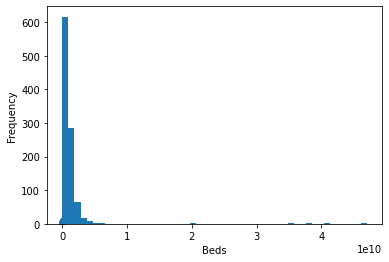

In [23]:
# scatter plot
house_df.plot.scatter(x='Beds',y='Baths')
# histogram
house_df["Price"].plot.hist(bins = 50)

In [24]:
import math
cleaned_house_df = house_df.dropna(how='any')
cleaned_house_df.reset_index(drop = True, inplace = True)
# radius of earth is 6378
r = 6378
dis_to_city = []
for i in range(len(cleaned_house_df)):
    
    lat1_n = math.radians(-37.818078)
    lat2 = math.radians(float(cleaned_house_df['Latitude'][i]))
    
    lon1_n = math.radians(144.96681)
    lon2 = math.radians(float(cleaned_house_df['Longitude'][i]))
    
    lon_diff_n = lon2 - lon1_n
    lat_diff_n = lat2 - lat1_n
    
    a_n = math.sin(lat_diff_n / 2)**2 + math.cos(lat1_n) * math.cos(lat2) * math.sin(lon_diff_n / 2)**2
    c_n = 2 * math.atan2(math.sqrt(a_n), math.sqrt(1 - a_n))
    
    dis_to_city.append(round(r*c_n, 4))
    
cleaned_house_df['distance_to_city'] = dis_to_city

/tmp/ipykernel_19208/2576992732.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_house_df['distance_to_city'] = dis_to_city


#### The last step is exporting Dataframe to some other tabular formats file including a CSV or an excel file.

In [ ]:
# exporting to csv file
cleaned_house_df.to_csv('BS_Clean_PropertiesInfo.csv', index=False)